In [1]:
import pandas as pd
import numpy as np
import re, os, string, time
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize

from bs4 import BeautifulSoup
nltk.download('wordnet')
nltk.download('words')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import timeit
stop_words = stopwords.words('english')
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saurabh.t.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\saurabh.t.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurabh.t.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saurabh.t.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saurabh.t.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
news = pd.read_excel(r'C:\Saurabh\Publication\tennis_articles.xlsx')

In [3]:
news

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP) — Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...
5,6,Rafael Nadal: World No 1 ARRIVES for Paris Mas...,Nadal has not played tennis since he was force...,https://www.express.co.uk/sport/tennis/1037119...
6,7,"TENNIS.COM PODCAST: POINT DEFENSE, RANKING DRO...","Tennis giveth, and tennis taketh away. The end...",http://www.tennis.com/pro-game/2018/10/tennisc...
7,8,Tennis journalist’s heartbreaking insight on T...,I PLAYED golf last week with Todd Reid. He pic...,https://www.foxsports.com.au/tennis/tennis-jou...


In [6]:
news['article_text'][0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [7]:
news['article_text_length'] = news['article_text'].apply(lambda x: len(str(x).split()))

In [8]:
news['article_text_length']

0    304
1    225
2    351
3    234
4    372
5    274
6    182
7    813
Name: article_text_length, dtype: int64

In [9]:
#define fucntions for deep cleaning - data normalization
def beauty(raw_text):
    res_text = BeautifulSoup(raw_text, "html.parser").get_text() 
    return res_text

def tokenize(text):
    result=sent_tokenize(text)
    result=[s for s in result if len(s)>5]
    return result if len(result) else np.NaN

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def LemTokens(tokens):
    tokens = [token for token in tokens if token not in stop_words] 
    return [lemmer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

def LemNormalize(text):
     return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def normalize(sent_list):
    return [" ".join(LemNormalize(s)) for s in sent_list]



In [10]:
news['sentences'] = news['article_text'].apply(beauty)
news['sentences'] = news['sentences'].apply(tokenize)
news['lem_sentences']= news['sentences'].apply(normalize)

In [11]:
news['lem_sentences']

0    [maria sharapova basically friend tennis playe...
1    [basel switzerland ap — roger federer advanced...
2    [roger federer reveal organiser relaunched con...
3    [kei nishikori try end long lose streak atp fi...
4    [federer 37 first broke tour two decade ago si...
5    [nadal played tennis since force retire u open...
6    [tennis giveth tennis taketh away, end season ...
7    [played golf last week todd reid, picked 530am...
Name: lem_sentences, dtype: object

In [12]:
news['sentences']

0    [Maria Sharapova has basically no friends as t...
1    [BASEL, Switzerland (AP) — Roger Federer advan...
2    [Roger Federer has revealed that organisers of...
3    [Kei Nishikori will try to end his long losing...
4    [Federer, 37, first broke through on tour over...
5    [Nadal has not played tennis since he was forc...
6    [Tennis giveth, and tennis taketh away., The e...
7    [I PLAYED golf last week with Todd Reid., He p...
Name: sentences, dtype: object

In [13]:
import spacy
#import wmd
nlp = spacy.load('en_core_web_md')
#nlp.add_pipe(wmd.WMD.SpacySimilarityHook(nlp), last=True)

In [14]:
def getVector(sentences):
    sentences_v = []
    for s in sentences:
        doc = nlp(s)
        sentences_v.append(doc.vector)
    return sentences_v

In [15]:
news['sentences_vector']= news['lem_sentences'].apply(getVector)

In [16]:
print(len(news['sentences_vector'][1]))
print(len(news['sentences_vector'][1][0]))

12
300


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
def getMatrix(sentences_vector):
    similarity_matrix = np.zeros([len(sentences_vector), len(sentences_vector)])
    for i in range(len(sentences_vector)):
        for j in range(len(sentences_vector)):
            similarity_matrix[i,j] = cosine_similarity(sentences_vector[i].reshape(1,300), sentences_vector[j].reshape(1,300))[0,0]
            #similarity_matrix[i,j] = sentences_vector[i].similarity(sentences_vector[j])

    return similarity_matrix     

In [18]:
news['similarity_matrix']= news['sentences_vector'].apply(getMatrix)

In [19]:
news['similarity_matrix'][0].shape

(19, 19)

In [20]:
import networkx as n

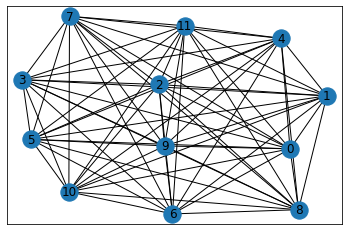

In [21]:
graph = n.from_numpy_array(news['similarity_matrix'][1])
n.draw_networkx(graph,arrows=True,with_labels=True)

In [22]:


def getPageRank(similarity_matrix):
    graph = n.from_numpy_array(similarity_matrix)
    page_rank = n.pagerank(graph)
    return page_rank

In [23]:
news['page_rank']= news['similarity_matrix'].apply(getPageRank)

In [24]:
def getSummary(row):
    dict = {}
    #print(row)
    for i,s in enumerate(row['sentences']):
        dict[s] = row['page_rank'].get(i) 
    df = pd.DataFrame.from_dict(dict, orient='index', columns=['page_rank']).reset_index().sort_values(['page_rank'], ascending=False)
    return list(df['index'].head(5))


In [25]:
news['summary'] = news.apply(lambda x: getSummary(x), axis=1)

In [26]:
news['summary'][2]


['“I could not make a decision in that time, so I told them to do what they wanted.” The 20-time Grand Slam champion has voiced doubts about the wisdom of the one-week format to be introduced by organisers Kosmos, who have promised the International Tennis Federation up to $3 billion in prize money over the next quarter-century.',
 'Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.',
 'Speaking at the Swiss Indoors tournament where he will play in Sunday’s final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.',
 '“They only left me three days to decide,” Federer said.',
 'Roger Federer has revealed that organisers of the re-launched and condensed Davis Cup gave him three days to decide if he would commit to the controversial competition.']

In [27]:
print("end")

end


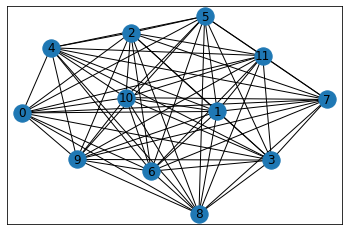

In [142]:
graph = n.from_numpy_array(news['similarity_matrix'][1])
#n.draw(graph)
n.draw_networkx(graph,arrows=True,with_labels=True)
#n.draw(graph, pos=n.spring_layout(graph))  # use spring layout